In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
data = pd.read_csv('ap_2pm.csv')
data.head(6)
#data.dtypes

,Time,Cost
0,08-03-2017,0.0334
1,09-03-2017,0.0342
2,10-03-2017,0.0333
3,11-03-2017,0.0335
4,12-03-2017,0.0334
5,13-03-2017,0.0337


In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y')
data = pd.read_csv('ap_2pm.csv', parse_dates=['Time'], index_col='Time',date_parser=dateparse)
data.head(5)

,Cost
Time,
2017-03-08,0.0334
2017-03-09,0.0342
2017-03-10,0.0333
2017-03-11,0.0335
2017-03-12,0.0334


In [4]:
data.index

DatetimeIndex(['2017-03-08', '2017-03-09', '2017-03-10', '2017-03-11',
               '2017-03-12', '2017-03-13', '2017-03-14', '2017-03-15',
               '2017-03-16', '2017-03-17', '2017-03-18', '2017-03-19',
               '2017-03-20', '2017-03-21', '2017-03-22', '2017-03-23',
               '2017-03-24', '2017-03-25', '2017-03-26', '2017-03-27',
               '2017-03-28', '2017-03-29', '2017-03-30', '2017-03-31',
               '2017-04-01', '2017-04-02', '2017-04-03', '2017-04-04',
               '2017-04-05', '2017-04-06', '2017-04-07', '2017-04-08',
               '2017-04-09', '2017-04-10', '2017-04-11', '2017-04-12',
               '2017-04-13', '2017-04-14', '2017-04-15', '2017-04-16',
               '2017-04-17', '2017-04-18', '2017-04-19', '2017-04-20',
               '2017-04-21'],
              dtype='datetime64[ns]', name='Time', freq=None)

In [5]:
ts = data['Cost']
ts.head(10)

Time
2017-03-08    0.0334
2017-03-09    0.0342
2017-03-10    0.0333
2017-03-11    0.0335
2017-03-12    0.0334
2017-03-13    0.0337
2017-03-14    0.0582
2017-03-15    0.0350
2017-03-16    0.0448
2017-03-17    0.0339
Name: Cost, dtype: float64

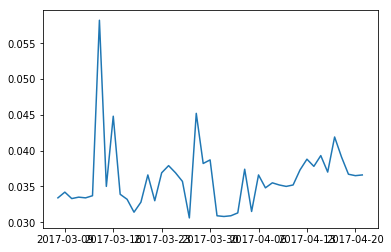

In [6]:
plt.plot(ts)

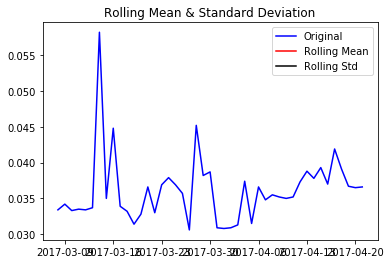

Test Statistic                 -3.436962
p-value                         0.009762
#Lags Used                      1.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64

In [7]:
from statsmodels.tsa.stattools import adfuller
    
    #Determing rolling statistics
#rolmean = pd.rolling_mean(ts, window=12)
#rolstd = pd.rolling_std(ts, window=12)

rolmean = ts.rolling(365).mean()
rolstd = ts.rolling(365).std()

    #Plot rolling statistics:
orig = plt.plot(ts, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)
    
    #Perform Dickey-Fuller test:
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

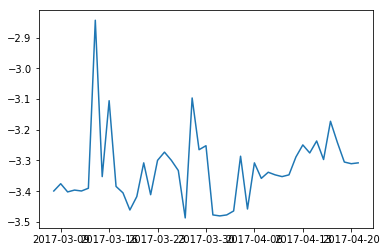

In [8]:
ts_log = np.log(ts)
plt.plot(ts_log)

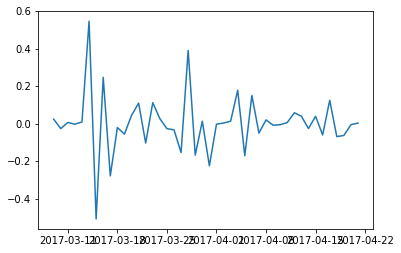

In [9]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

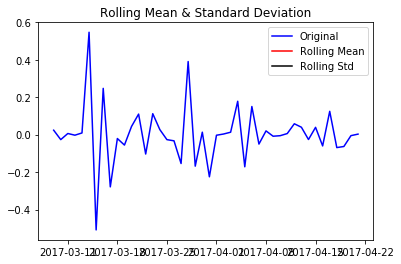

Test Statistic                 -4.994952
p-value                         0.000023
#Lags Used                      3.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64

In [10]:
ts_log_diff.dropna(inplace=True)
rolmean = ts_log_diff.rolling(365).mean()
rolstd = ts_log_diff.rolling(365).std()

    #Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)
    
    #Perform Dickey-Fuller test:
dftest = adfuller(ts_log_diff, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

In [11]:
from statsmodels.tsa.stattools import acf, pacf

In [12]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5,1,'Autocorrelation Function')

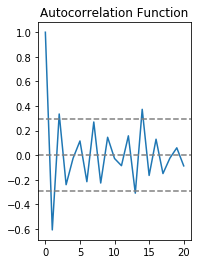

In [13]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

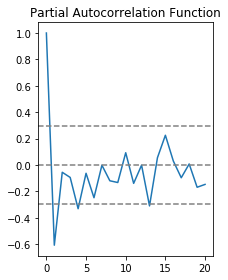

In [14]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [15]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\Piyush\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Piyush\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 0.7040')

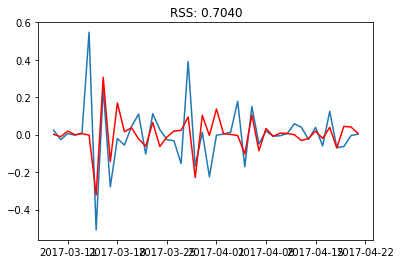

In [16]:
#AR model
model = ARIMA(ts_log, order=(1, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

C:\Users\Piyush\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Piyush\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 0.6609')

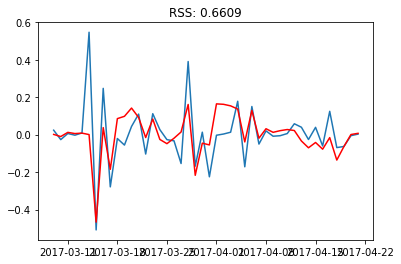

In [17]:
model = ARIMA(ts_log, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

C:\Users\Piyush\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\Piyush\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5,1,'RSS: 0.6579')

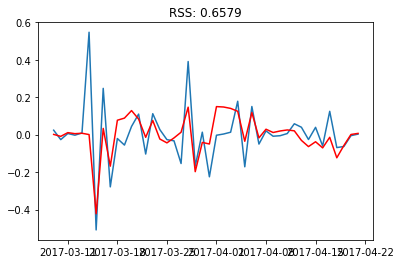

In [18]:
#combined model
model = ARIMA(ts_log, order=(1, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [19]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head(5)



Time
2017-03-09    0.001094
2017-03-10   -0.009228
2017-03-11    0.010686
2017-03-12    0.005089
2017-03-13    0.007265
dtype: float64

In [20]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head(5)

Time
2017-03-09    0.001094
2017-03-10   -0.008135
2017-03-11    0.002552
2017-03-12    0.007640
2017-03-13    0.014906
dtype: float64

In [21]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head(5)

C:\Users\Piyush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Time
2017-03-08   -3.399199
2017-03-09   -3.398106
2017-03-10   -3.407334
2017-03-11   -3.396648
2017-03-12   -3.391559
dtype: float64

Text(0.5,1,'RMSE: 0.0095')

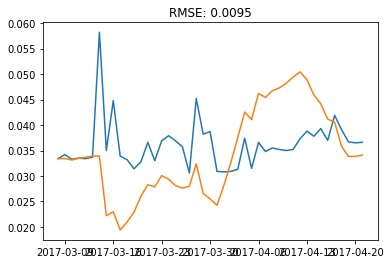

In [22]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [28]:
predictions_ARIMA.to_csv("ap_2PM_Pred.csv", sep=',') 